## Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.git', '.gitignore', '.ipynb_checkpoints', 'heart.csv', 'heart_disease_nbc.ipynb', 'README.md']


In [2]:
dataset = pd.read_csv("heart.csv")

In [3]:
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
dataset.shape

(1025, 14)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


#### Getting all the details like mean, standard deviation, minimum etc of the target variable

In [6]:
dataset['target'].describe()

count    1025.000000
mean        0.513171
std         0.500070
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: target, dtype: float64

In [7]:
dataset['target'].unique()

array([0, 1], dtype=int64)

##### From the above result i.e dataset.unique() result, we can see that this is a classification problem. You should classify a datapoint as a 0 or 1.

## Correlations

In [8]:
print(dataset.corr()['target'].abs().sort_values(ascending=False))

target      1.000000
oldpeak     0.438441
exang       0.438029
cp          0.434854
thalach     0.422895
ca          0.382085
slope       0.345512
thal        0.337838
sex         0.279501
age         0.229324
trestbps    0.138772
restecg     0.134468
chol        0.099966
fbs         0.041164
Name: target, dtype: float64


## Exploratory Data Analysis

1    526
0    499
Name: target, dtype: int64


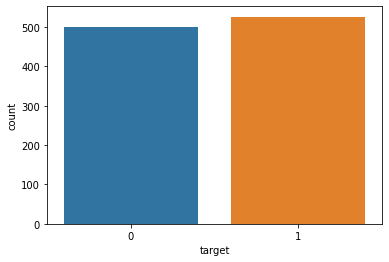

In [9]:
y = dataset['target']
sns.countplot(y)
target_temp = dataset.target.value_counts()
print(target_temp)

#### Analysing other columns like age, sex etc.

In [10]:
dataset["sex"].unique()

array([1, 0], dtype=int64)

<AxesSubplot:xlabel='sex', ylabel='target'>

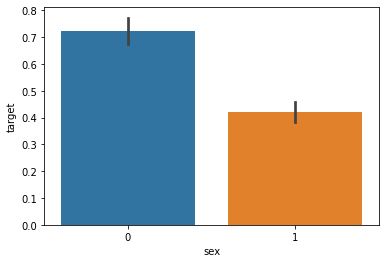

In [11]:
sns.barplot(dataset["sex"],y)

#### Through the above plot we can conclude that females are more likely to have heart problems when compared to males.

#### Next we analyze the chest pain type feature

In [12]:
dataset["cp"].unique()

array([0, 1, 2, 3], dtype=int64)

<AxesSubplot:xlabel='cp', ylabel='target'>

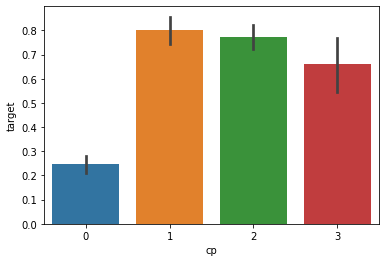

In [13]:
sns.barplot(dataset["cp"],y)

#### From the plot above we see that chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems

### Analysing the restecg feature

In [14]:
dataset["restecg"].unique()

array([1, 0, 2], dtype=int64)

<AxesSubplot:xlabel='restecg', ylabel='target'>

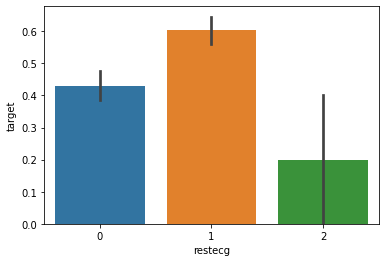

In [15]:
sns.barplot(dataset["restecg"],y)

#### From the above plot we see that people with restecg 0 and 1 are more likely to have a heart attack than the ones with restecg 2.

### Analyzing the slope feature

In [16]:
dataset["slope"].unique()

array([2, 0, 1], dtype=int64)

<AxesSubplot:xlabel='slope', ylabel='target'>

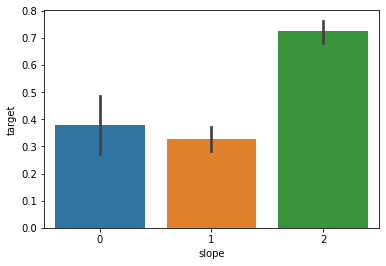

In [17]:
sns.barplot(dataset["slope"],y)

#### The graph above shows that the slope 2 causes heart pain much more than those with 1 and 0

### Analysing the exang feature

In [18]:
dataset["exang"].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='exang', ylabel='target'>

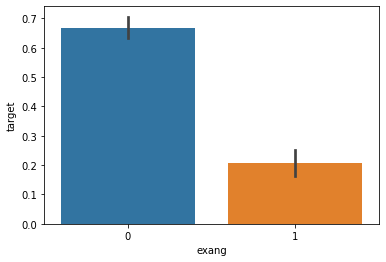

In [19]:
sns.barplot(dataset["exang"],y)

#### The exang value of 1 i.e exercise induced angina are less likely to suffer from a heart disease

### Analyzing the FBS feature

In [20]:
dataset["fbs"].describe()

count    1025.000000
mean        0.149268
std         0.356527
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: fbs, dtype: float64

In [21]:
dataset["fbs"].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='fbs', ylabel='target'>

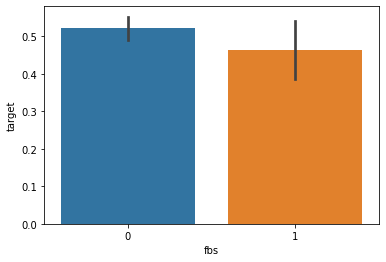

In [22]:
sns.barplot(dataset["fbs"],y)

#### The plot looks alike for fbs = 1 and fbs = 0. So, nothing can be said from here

### Analysing the tha1 feature

In [23]:
dataset["thal"].unique()

array([3, 2, 1, 0], dtype=int64)

<AxesSubplot:xlabel='thal', ylabel='target'>

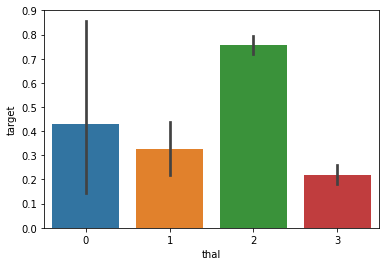

In [24]:
sns.barplot(dataset["thal"],y)

<AxesSubplot:xlabel='thal', ylabel='Density'>

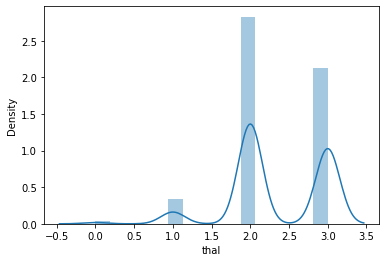

In [25]:
sns.distplot(dataset["thal"])

#### The value of tha1 = 2 indicates that the person is more likely to suffer from a heart disease

### Analysing the ca feature

In [26]:
dataset["ca"].unique()

array([2, 0, 1, 3, 4], dtype=int64)

<AxesSubplot:xlabel='ca', ylabel='count'>

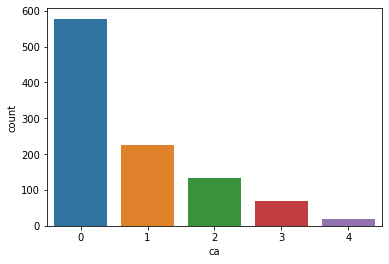

In [27]:
sns.countplot(dataset["ca"])

<AxesSubplot:xlabel='ca', ylabel='target'>

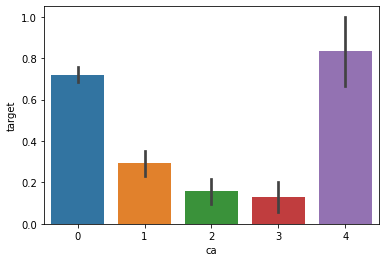

In [28]:
sns.barplot(dataset["ca"],y)

#### Patients with ca = 4 have a high risk of suffering from a heart disease

## Train - Test split

In [29]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [30]:
X_train.shape

(820, 13)

In [31]:
X_test.shape

(205, 13)

In [32]:
Y_train.shape

(820,)

In [33]:
Y_test.shape

(205,)

## Model Fitting

### Naive Bayes Classifer (NBC)

In [34]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [35]:
Y_pred_nb.shape

(205,)

In [36]:
from sklearn.metrics import accuracy_score
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.37 %


#### Printing confusion matrix

In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_pred_nb)

array([[79, 19],
       [11, 96]], dtype=int64)

#### Plotting the ROC curve

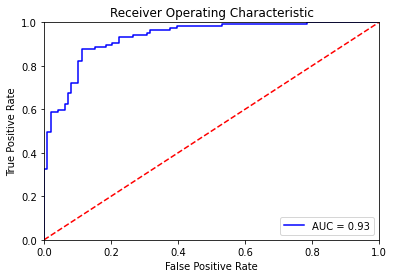

In [38]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = nb.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()